<a href="https://colab.research.google.com/github/m-abbas-ansari/Machine-Learning-And-Data-Science/blob/main/Housing_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download the Data

In [ ]:
housing_url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"

In [ ]:
import os
housing_path = os.path.join("datasets", "housing") # datasets/housing
os.makedirs(housing_path, exist_ok=True)

In [ ]:
import urllib.request
tgz_path = os.path.join(housing_path, "housing.tgz") # datasets/housing/housing.tgz
urllib.request.urlretrieve(housing_url, tgz_path)

('datasets/housing/housing.tgz', <http.client.HTTPMessage at 0x7f608b859e10>)

In [ ]:
import tarfile
housing_tgz = tarfile.open(tgz_path)
housing_tgz.extractall(path=housing_path)
housing_tgz.close()

In [ ]:
import pandas as pd
housing = pd.read_csv("datasets/housing/housing.csv")

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0981e99d10>,
      dtype=object)

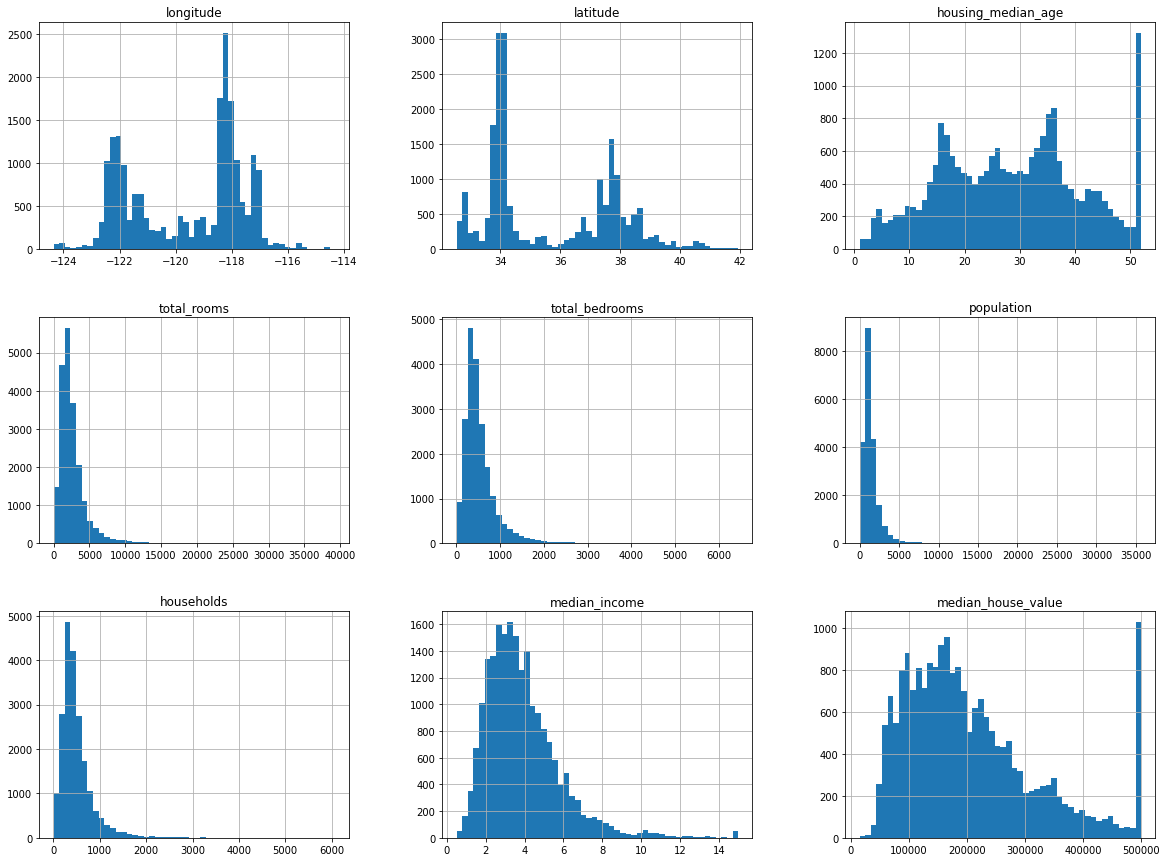

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

### Create a Test Set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=41) 

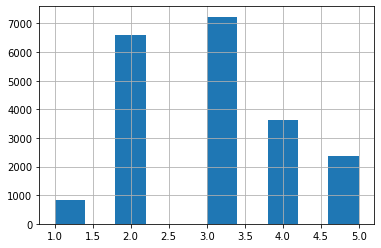

In [ ]:
import numpy as np
housing["income_category"] = pd.cut(housing["median_income"],
                                    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                    labels=[1, 2, 3, 4, 5])
housing["income_category"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=41)
split.split(housing, housing["income_category"])

<generator object BaseShuffleSplit.split at 0x7f607c46c2d0>

In [ ]:
for train_index, test_index in split.split(housing, housing["income_category"]):
  strat_test_set = housing.loc[test_index]
  strat_train_set = housing.loc[train_index]

### Exploratory Data Analysis (EDA)

In [ ]:
housing = strat_train_set.copy()
housing_labels = housing[['median_house_value']]
housing = housing.drop("median_house_value", axis=1)

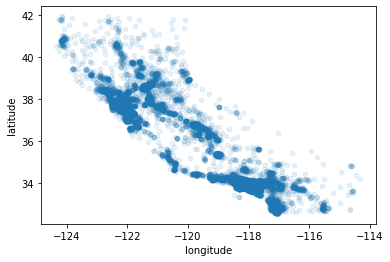

In [ ]:
# Geographical data
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

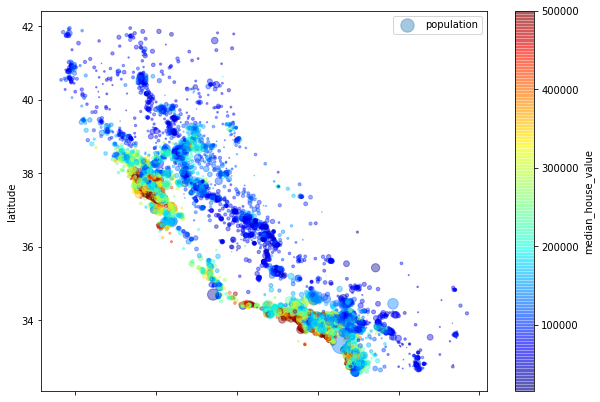

In [ ]:
# use color to indicate the median prices of house in each district
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population",
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(10,7))

In [ ]:
# Looking for correlation 
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687668
total_rooms           0.131987
housing_median_age    0.111686
households            0.063285
total_bedrooms        0.046671
population           -0.024677
longitude            -0.049897
latitude             -0.141620
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0970b79490>,
      dtype=object)

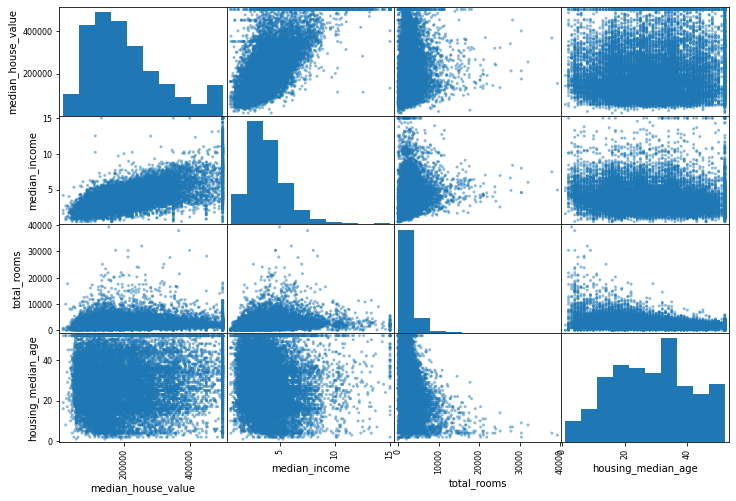

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

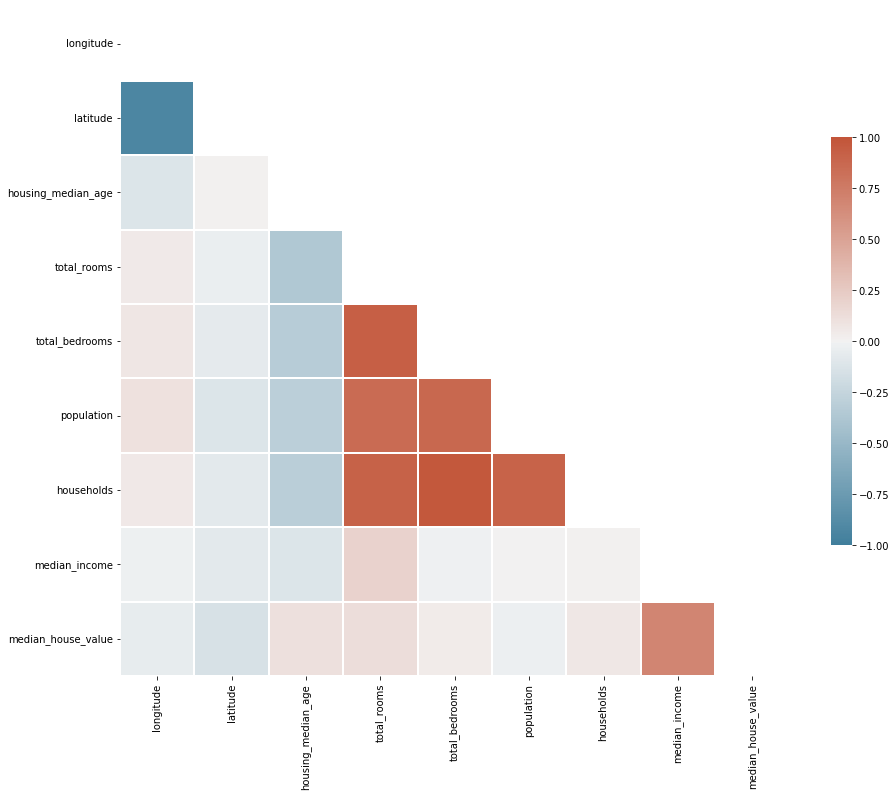

In [ ]:
import seaborn as sns
def plot(corr):
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f, ax = plt.subplots(figsize=(15, 15))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0.0, square=True, linewidths=1, cbar_kws={"shrink": .5})
plot(corr_matrix)

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
11632,-118.03,33.82,20.0,2662.0,464.0,1275.0,472.0,6.0162,318500.0,<1H OCEAN,5
10673,-117.85,33.62,13.0,5192.0,658.0,1865.0,662.0,15.0001,500001.0,<1H OCEAN,5
12532,-121.51,38.57,36.0,613.0,166.0,425.0,147.0,2.2031,93800.0,INLAND,2
2600,-123.63,41.11,19.0,1797.0,384.0,1033.0,327.0,1.4911,59200.0,<1H OCEAN,1
12074,-117.60,33.87,18.0,6450.0,1165.0,3716.0,1113.0,4.2721,150300.0,INLAND,3


In [ ]:
new_house = housing.copy()

In [ ]:
new_house["rooms_per_household"] = housing["total_rooms"]/housing["households"]
new_house["bedroom_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
new_house["population_per_household"] = housing["population"]/housing["households"]
new_corr = new_house.corr()
new_corr["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687668
rooms_per_household         0.155908
total_rooms                 0.131987
housing_median_age          0.111686
households                  0.063285
total_bedrooms              0.046671
population                 -0.024677
population_per_household   -0.032129
longitude                  -0.049897
latitude                   -0.141620
bedroom_per_room           -0.256628
Name: median_house_value, dtype: float64

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room=True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

### Handling Missing Values

In [ ]:
new_house.dropna(subset=["total_bedrooms"])
new_house.drop("total_bedrooms", axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 11632 to 6464
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16348 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   median_house_value  16512 non-null  float64 
 9   ocean_proximity     16512 non-null  object  
 10  income_category     16512 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB


In [ ]:
median = housing["total_bedrooms"].median()
new_house["total_bedrooms"].fillna(median, inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer
SimpleImputer(strategy="median")

In [ ]:
housing_num = housing.drop("ocean_proximity", axis=1)
housing_cat = housing[['ocean_proximity']]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy="median")),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler())
])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
#Tranformation Pipeline
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
                                   ('num', num_pipeline, num_attribs),
                                   ('cat', OneHotEncoder(), cat_attribs)
])

In [ ]:
housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
housing_prepared.shape

(16512, 17)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

55675.08426630491

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
  print("Scores: {} \nMean: {} \nStandard Deviation: {}".format(scores, scores.mean(), scores.std()))


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, 
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse = np.sqrt(-scores)
display_scores(forest_rmse)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was

Scores: [48213.34630473 48911.24064976 51340.95002333 50886.91497527
 48811.59107916 51588.3784063  51454.80186082 49143.76069994
 49135.29417945 48183.46500874] 
Mean: 49766.97431874984 
Standard Deviation: 1313.4555666379847


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid =[
             {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
             {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

In [ ]:
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

In [ ]:
grid_search.fit(housing_prepared, housing_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

64018.72767832082 {'max_features': 2, 'n_estimators': 3}
55205.40105246366 {'max_features': 2, 'n_estimators': 10}
52510.84672513119 {'max_features': 2, 'n_estimators': 30}
60976.886634122166 {'max_features': 4, 'n_estimators': 3}
53272.53510926931 {'max_features': 4, 'n_estimators': 10}
50777.474871781 {'max_features': 4, 'n_estimators': 30}
58856.84859969188 {'max_features': 6, 'n_estimators': 3}
52130.321511774775 {'max_features': 6, 'n_estimators': 10}
50659.19937808861 {'max_features': 6, 'n_estimators': 30}
59466.31577496281 {'max_features': 8, 'n_estimators': 3}
52687.06712455808 {'max_features': 8, 'n_estimators': 10}
50539.68126686236 {'max_features': 8, 'n_estimators': 30}
61715.66979228928 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53958.435157218446 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60086.15645542002 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52334.39378373057 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

### Evaluating on test set

In [ ]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [ ]:
from sklearn.metrics import mean_squared_error

X_test_prepared = full_pipeline.transform(X_test)
final_prediction = best_forest.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)
final_rmse

50752.73821653927